# Exploratory Data Analysis

## Hinal Patil

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import dataset
data = pd.read_csv("C:/Users/Hinal/Desktop/The GRIP FOUNDATION/SampleSuperstore.csv")

In [5]:
# Understand the data

In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
data.shape

(9994, 13)

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
# Clean the data

In [14]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
s_profit = pd.DataFrame({'State': data.State, 'Profit': data.Profit})
s_profit.head()

,State,Profit
0,Kentucky,41.9136
1,Kentucky,219.5820
2,California,6.8714
3,Florida,-383.0310
4,Florida,2.5164


In [19]:
# summing profit of each state
s_data = s_profit.groupby(['State'], as_index = False).sum()

In [20]:
s_data.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579


In [21]:
s_data.shape

(49, 2)

Text(0.5, 1.0, 'Profit of each State0')

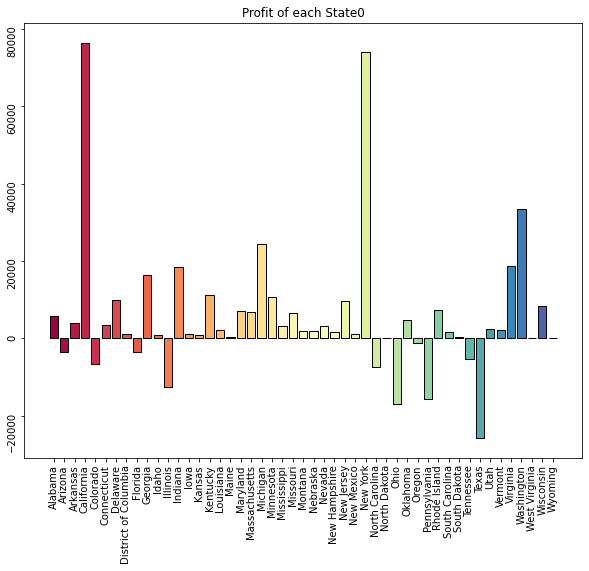

In [23]:
# there is a problem we have states with negative profit
colors = [plt.cm.Spectral(i/float(s_data.shape[0])) for i in range(s_data.shape[0])]
figure = plt.figure(figsize = (10,8))
ax = figure.add_subplot()
plt.bar(s_data['State'], s_data['Profit'], color = colors, edgecolor = 'Black')
ax.tick_params(axis = 'x', labelrotation = 90)
ax.tick_params(axis = 'y', labelrotation = 90)
ax.set_title("Profit of each State0", fontsize = 12)

In [26]:
# Now, explore sales and profit
sales = pd.DataFrame({'State': data.State, 'Sales': data.Sales, 'Profit': data.Profit})
sales.head()

,State,Sales,Profit
0,Kentucky,261.9600,41.9136
1,Kentucky,731.9400,219.5820
2,California,14.6200,6.8714
3,Florida,957.5775,-383.0310
4,Florida,22.3680,2.5164


In [27]:
# total sales and profit of each state
total_s_profit = sales.groupby(['State'], as_index = False).sum()
total_s = total_s_profit.set_index('State')
total_s_profit.head()

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


Text(0.5, 1.0, 'Sales vs. Profit')

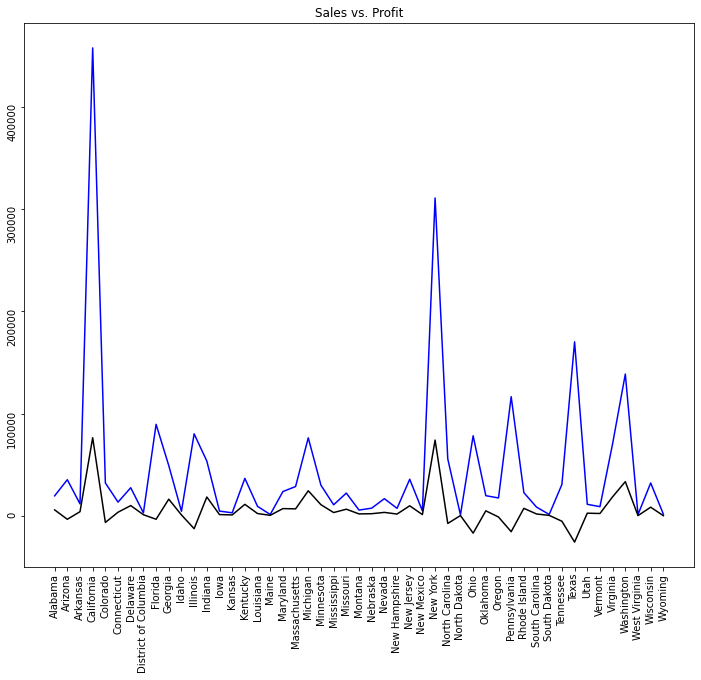

In [30]:
# Thereare some states with high sales and low profit
# lets improve profit
figure = plt.figure(figsize = (12,10))
ax = figure.add_subplot()
ax.plot(total_s['Sales'], color = 'blue', label = 'Sales')
ax.plot(total_s['Profit'], color = 'black', label = 'Profit')
ax.tick_params(axis = 'x', labelrotation = 90)
ax.tick_params(axis = 'y', labelrotation = 90)
ax.set_title("Sales vs. Profit", fontsize = 12)

In [31]:
df = total_s_profit[total_s_profit['Profit']<0]
df

,State,Sales,Profit
1,Arizona,35282.0010,-3427.9246
4,Colorado,32108.1180,-6527.8579
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
31,North Carolina,55603.1640,-7490.9122
33,Ohio,78258.1360,-16971.3766
35,Oregon,17431.1500,-1190.4705
36,Pennsylvania,116511.9140,-15559.9603
40,Tennessee,30661.8730,-5341.6936
41,Texas,170188.0458,-25729.3563


In [32]:
low_profit = data[data["State"].isin(df.State)]

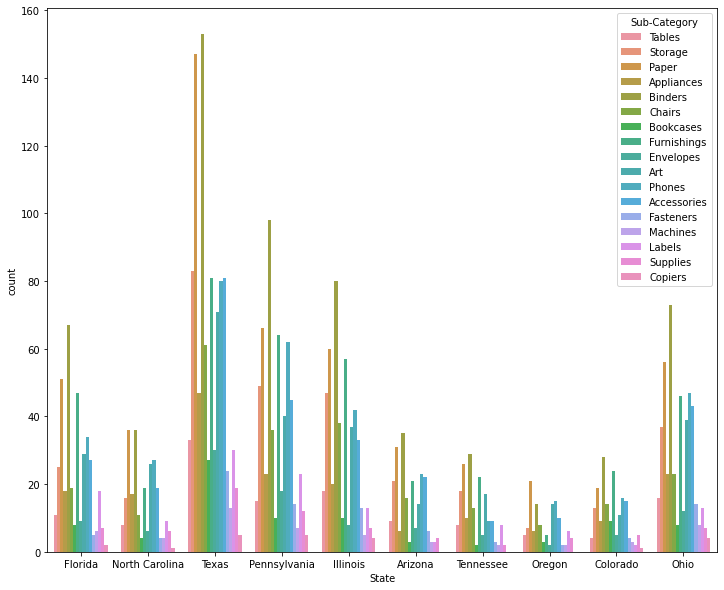

In [33]:
# count of sales of each sub-category
plt.figure(figsize = (12,10))
sns.countplot(x = 'State', hue = 'Sub-Category', data = low_profit)

In [35]:
sales = pd.DataFrame({'Sub-Category': low_profit['Sub-Category'], 'Sales': low_profit.Sales, 'Profit':low_profit.Profit})
sales_profit = sales.groupby('Sub-Category', as_index = True).sum()
sales_profit

,Sales,Profit
Sub-Category,,
Accessories,49010.0080,6647.3818
Appliances,25141.8220,-6131.8115
Art,9104.1520,1147.1864
Binders,36140.6130,-38510.4964
Bookcases,32608.3508,-11318.1336
Chairs,107557.8540,-5697.2895
Copiers,31319.4900,6331.8881
Envelopes,5869.9520,1987.1923
Fasteners,1201.4400,297.3130


Text(0.5, 1.0, 'Sales vs. Profit')

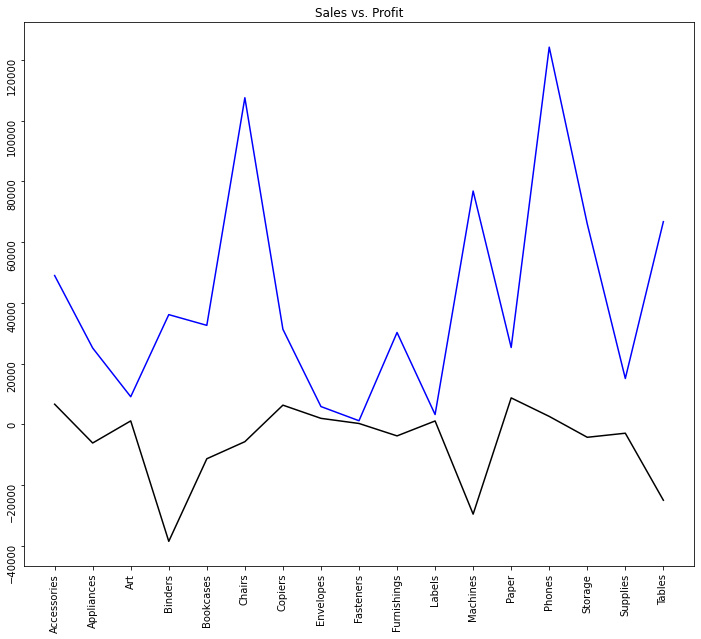

In [36]:
# we can stop selling item which have low sales
figure = plt.figure(figsize = (12,10))
ax = figure.add_subplot()
ax.plot(sales_profit['Sales'], color = 'blue', label = 'Sales')
ax.plot(sales_profit['Profit'], color = 'black', label = 'Profit')
ax.tick_params(axis = 'x', labelrotation = 90)
ax.tick_params(axis = 'y', labelrotation = 90)
ax.set_title("Sales vs. Profit", fontsize = 12)

**1. In low profit sates we can stop selling items with very low sales.**

**2. We should reduce the discount of high selling products.**